In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
df1 = pd.read_csv('ratings data.csv')
df1.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [41]:
df2 = pd.read_csv('movies data.csv')
df2.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [42]:
df1.shape

(1000209, 4)

In [43]:
df2.shape

(3883, 3)

In [44]:
df = pd.merge(df1,df2,how='inner',on='MovieID')
df.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [45]:
df.shape

(1000209, 6)

In [46]:
df.sort_values(by='UserID', inplace=True)
df.reset_index(inplace=True)

In [47]:
df.head()

,index,UserID,MovieID,Rating,Timestamp,Title,Genres
0,0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,28501,1,48,5,978824351,Pocahontas (1995),Animation|Children's|Musical|Romance
2,13819,1,938,4,978301752,Gigi (1958),Musical
3,51327,1,1207,4,978300719,To Kill a Mockingbird (1962),Drama
4,31152,1,1721,4,978300055,Titanic (1997),Drama|Romance


In [48]:
df.drop(['index', 'Timestamp', 'UserID'], axis=1, inplace = True)

In [49]:
df.head()

,MovieID,Rating,Title,Genres
0,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,48,5,Pocahontas (1995),Animation|Children's|Musical|Romance
2,938,4,Gigi (1958),Musical
3,1207,4,To Kill a Mockingbird (1962),Drama
4,1721,4,Titanic (1997),Drama|Romance


<h4>Identification of Missing Values

In [50]:
df.isnull().sum()

MovieID    0
Rating     0
Title      0
Genres     0
dtype: int64

In [51]:
df[df==0].count()

MovieID    0
Rating     0
Title      0
Genres     0
dtype: int64

<h4>Eliminating Duplicates

In [52]:
df.drop_duplicates(inplace=True)

In [53]:
df.shape

(16912, 4)

<h4> Analysis

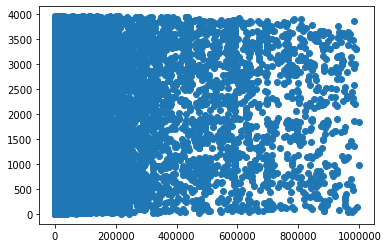

In [54]:
plt.scatter(df.index, df['MovieID'])

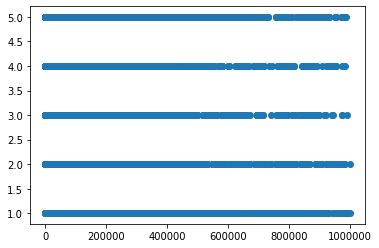

In [55]:
plt.scatter(df.index,df['Rating'])

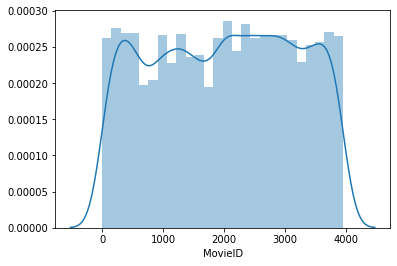

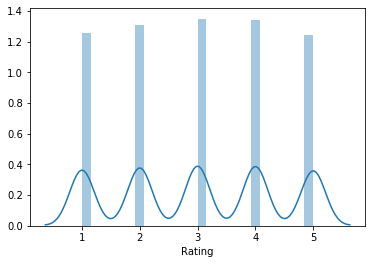

In [56]:
for i in df.describe().columns:
    sns.distplot(df[i].dropna())
    plt.show()

In [57]:
df.to_csv('Cleaned_Dataset.csv', index=False)